# 18CSC402 - DEEP LEARNING

HANDWRITTEN CHARACTER LANGUAGE : Malayalam

NOISE USED : Salt & Pepper

In [ ]:
import os
import cv2
import random
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from skimage.util import random_noise
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input

In [ ]:
# reading the images from its location

SIZE = 64
X, X_noisy = [], []
img_path = "/content/drive/MyDrive/MalayalamHandwrittenData/"
for folder in os.listdir(img_path):
  path = img_path+folder+"/"
  files = os.listdir(path)
  for i in range(300):
    filename = files[i]
    img = cv2.imread(path+filename,0)
    img = cv2.resize(img,(SIZE,SIZE))
    img_array = img_to_array(img)
    X.append(img_array)
    noisy_img = random_noise(img, mode="s&p", amount=0.25)
    X_noisy.append(noisy_img)

X_noisy = np.reshape(X_noisy, (len(X_noisy), SIZE, SIZE, 1))
X_noisy = X_noisy.astype('float32') / 255.0
X = np.reshape(X, (len(X), SIZE, SIZE, 1))
X = X.astype('float32') / 255.0
print("Noisy data shape:", X_noisy.shape)
print("Clean data shape:", X.shape)

Noisy data shape: (4500, 64, 64, 1)
Clean data shape: (4500, 64, 64, 1)


In [ ]:
# splitting data into train and validation sets

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_noisy, X, test_size=0.2)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(3600, 64, 64, 1)
(900, 64, 64, 1)
(3600, 64, 64, 1)
(900, 64, 64, 1)


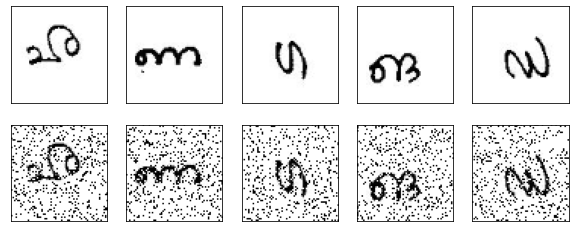

In [ ]:
# plotting some sample clean and corresponding noisy images

num = [random.randint(0,4500) for i in range(5)]
n = len(num)
plt.figure(figsize=(10, 4))
for i in range(n):

    # Show sample test images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X[num[i]].reshape(SIZE, SIZE), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Show corresponding output images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_noisy[num[i]].reshape(SIZE, SIZE), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
# ARCHITECTURE : convolutional autoencoder

# Encoder
input = Input(shape=(64, 64, 1))                                                # 64*64*1
x = Conv2D(64, (3, 3), activation="relu", padding="same")(input)                # 64*64*64
x = MaxPooling2D((2, 2), padding="same")(x)                                     # 32*32*64
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)                    # 32*32*32
x = MaxPooling2D((2, 2), padding="same")(x)                                     # 16*16*32
x = Conv2D(16, (3, 3), activation="relu", padding="same")(x)                    # 16*16*16
# encoder model
encoder = keras.Model(input, x)

# Decoder
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)                    # 16*16*32
x = UpSampling2D((2, 2))(x)                                                     # 32*32*32
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)                    # 32*32*64
x = UpSampling2D((2, 2))(x)                                                     # 64*64*64
output = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)             # 64*64*1

# Model
conv_autoencoder = keras.Model(input, output)

In [ ]:
# Compiling the model

conv_autoencoder.compile(optimizer="adam", loss="mse")
conv_autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        4624

In [ ]:
# fitting the model

history = conv_autoencoder.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, batch_size=128)

Epoch 1/50
29/29 [==============================] - 34s 108ms/step - loss: 0.4005 - val_loss: 0.2560
Epoch 2/50
29/29 [==============================] - 3s 88ms/step - loss: 0.2437 - val_loss: 0.2262
Epoch 3/50
29/29 [==============================] - 3s 92ms/step - loss: 0.2049 - val_loss: 0.1896
Epoch 4/50
29/29 [==============================] - 3s 89ms/step - loss: 0.1864 - val_loss: 0.1841
Epoch 5/50
29/29 [==============================] - 3s 88ms/step - loss: 0.1828 - val_loss: 0.1791
Epoch 6/50
29/29 [==============================] - 3s 89ms/step - loss: 0.1781 - val_loss: 0.1743
Epoch 7/50
29/29 [==============================] - 3s 90ms/step - loss: 0.1667 - val_loss: 0.1708
Epoch 8/50
29/29 [==============================] - 3s 88ms/step - loss: 0.1494 - val_loss: 0.1351
Epoch 9/50
29/29 [==============================] - 3s 89ms/step - loss: 0.1252 - val_loss: 0.1185
Epoch 10/50
29/29 [==============================] - 3s 89ms/step - loss: 0.1140 - val_loss: 0.1098
Epoch 1

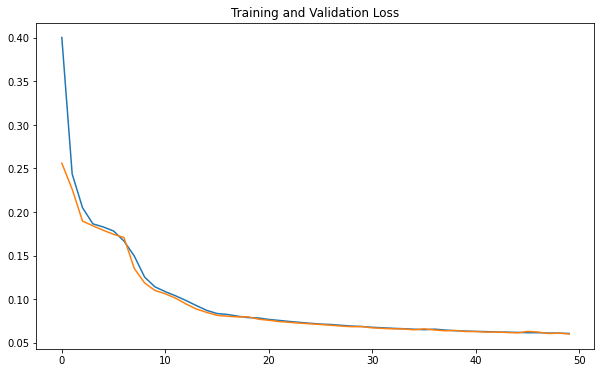

In [ ]:
# plotting the train and validation loss curves

loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(10,6)) 
epochs = 50

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')

plt.show()

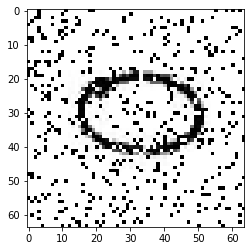

In [ ]:
# demonstrating the prediction on an image in the validation set
plt.imshow(X_valid[1].reshape(64,64), cmap="gray")

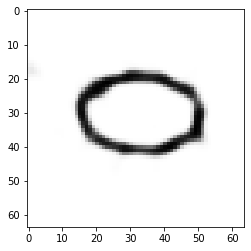

In [ ]:
# denoised output of the image
output = conv_autoencoder.predict([X_valid[1].reshape(-1,64,64,1)])[0]
plt.imshow(output.reshape(64,64), cmap="gray")

(64, 64, 1)


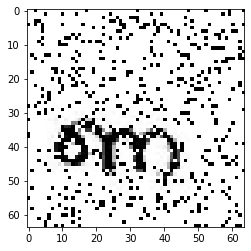

In [ ]:
# checking the reconstruction power on unseen data

test_img = cv2.imread("/content/drive/MyDrive/MalayalamHandwrittenSubset/Malayalam Handwritten Subset/15.jpg",0)
test_img = cv2.resize(test_img,(SIZE,SIZE))
test_noisy_img = random_noise(test_img, mode="s&p", amount=0.25)
test_noisy_img_reshaped = np.reshape(test_noisy_img, (SIZE, SIZE,1))
test_noisy_img_reshaped = test_noisy_img_reshaped.astype('float32') / 255.0
denoised_img = conv_autoencoder.predict([test_noisy_img_reshaped.reshape(-1,64,64,1)])[0]
print(denoised_img.shape)
plt.imshow(test_noisy_img, cmap="gray")

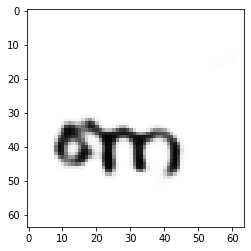

In [ ]:
plt.imshow(denoised_img.reshape(64,64), cmap="gray")

PREDICTING ONE SAMPLE FROM EACH OF THE 15 CHARACTERS

In [ ]:
dir_path = "/content/drive/MyDrive/MalayalamHandwrittenSubset/Malayalam Handwritten Subset/"
SIZE = 64
test_clean, test_noisy = [], []
for filename in os.listdir(dir_path):
    img = cv2.imread(dir_path+filename,0)
    img = cv2.resize(img,(SIZE,SIZE))
    img_array = img_to_array(img)
    test_clean.append(img_array)
    noisy_img = random_noise(img, mode="s&p", amount=0.25)
    test_noisy.append(noisy_img)

test_noisy = np.reshape(test_noisy, (len(test_noisy), SIZE, SIZE, 1))
test_noisy = test_noisy.astype('float32') / 255.0
test_clean = np.reshape(test_clean, (len(test_clean), SIZE, SIZE, 1))
test_clean = test_clean.astype('float32') / 255.0
print("Noisy test data shape:", test_noisy.shape)
print("Clean test data shape:", test_clean.shape)

Noisy test data shape: (15, 64, 64, 1)
Clean test data shape: (15, 64, 64, 1)


In [ ]:
# decoding the noisy images
test_decoded = conv_autoencoder.predict([test_noisy.reshape(-1,64,64,1)])

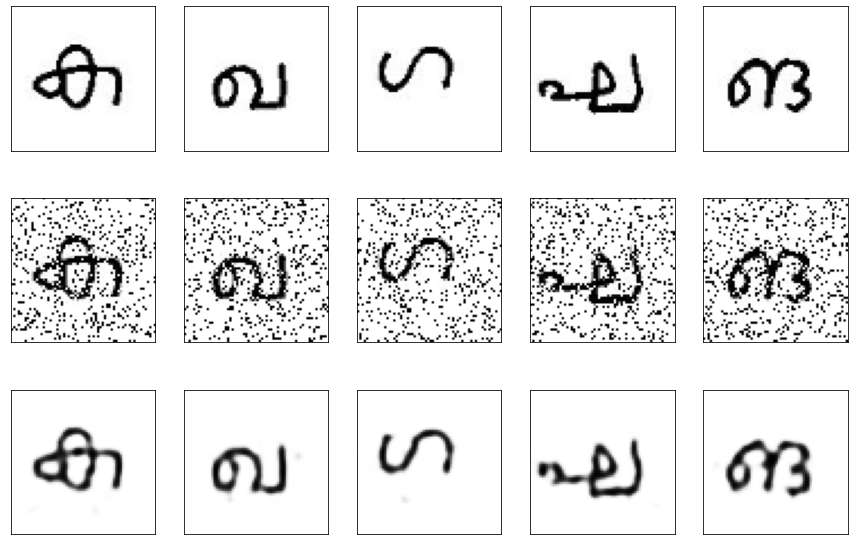

In [ ]:
# visualisation of adding noise to data and predicting (first 5 characters)

plt.figure(figsize=(15, 10))
for i in range(5):
  # original clean images
  fig = plt.subplot(3,5,i+1)
  plt.imshow(test_clean[i].reshape(64,64), cmap="gray")
  fig.get_xaxis().set_visible(False)
  fig.get_yaxis().set_visible(False)

  # noisy images
  fig = plt.subplot(3,5,i+1+5)
  plt.imshow(test_noisy[i].reshape(64,64), cmap="gray")
  fig.get_xaxis().set_visible(False)
  fig.get_yaxis().set_visible(False)

  # decoded images
  fig = plt.subplot(3,5,i+1+(2*5))
  plt.imshow(test_decoded[i].reshape(64,64), cmap="gray")
  fig.get_xaxis().set_visible(False)
  fig.get_yaxis().set_visible(False)

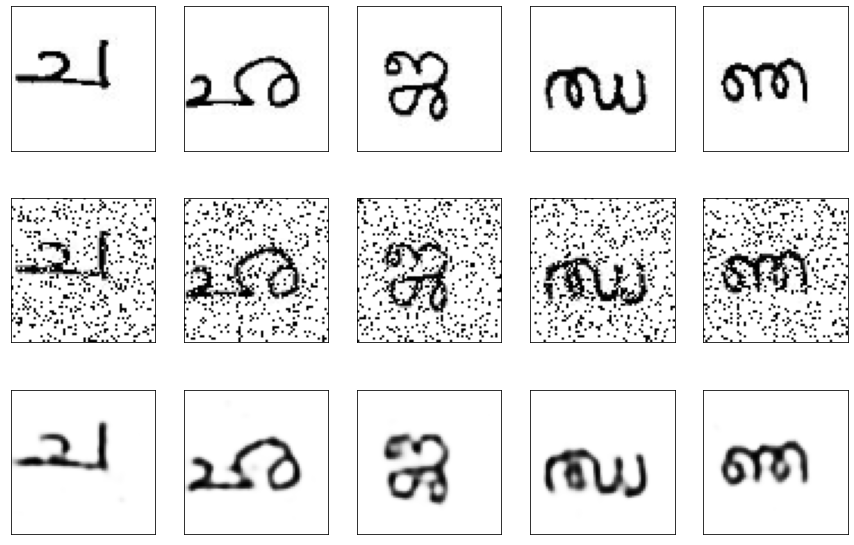

In [ ]:
# visualisation of adding noise to data and predicting (next 5 characters)

plt.figure(figsize=(15, 10))
for i in range(5):
  # original clean images
  fig = plt.subplot(3,5,i+1)
  plt.imshow(test_clean[i+5].reshape(64,64), cmap="gray")
  fig.get_xaxis().set_visible(False)
  fig.get_yaxis().set_visible(False)

  # noisy images
  fig = plt.subplot(3,5,i+1+5)
  plt.imshow(test_noisy[i+5].reshape(64,64), cmap="gray")
  fig.get_xaxis().set_visible(False)
  fig.get_yaxis().set_visible(False)

  # decoded images
  fig = plt.subplot(3,5,i+1+(2*5))
  plt.imshow(test_decoded[i+5].reshape(64,64), cmap="gray")
  fig.get_xaxis().set_visible(False)
  fig.get_yaxis().set_visible(False)

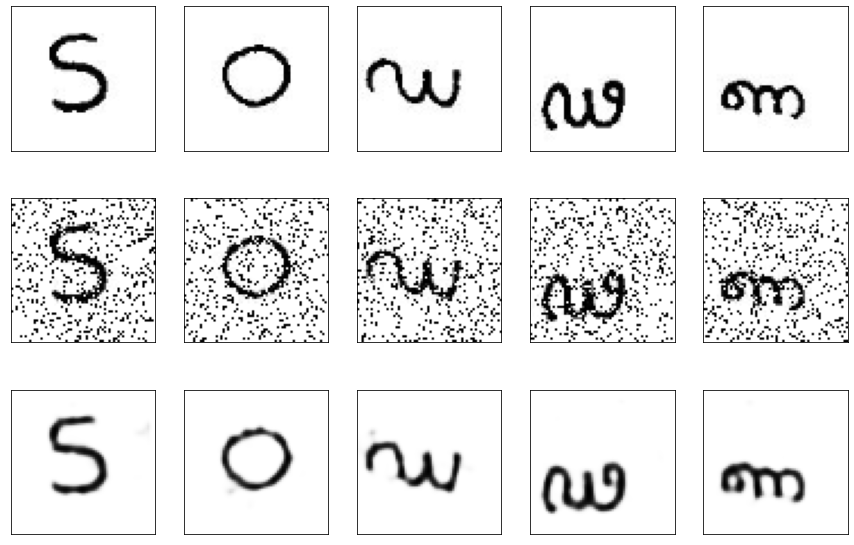

In [ ]:
# visualisation of adding noise to data and predicting (last 5 characters)

plt.figure(figsize=(15, 10))
for i in range(5):
  # original clean images
  fig = plt.subplot(3,5,i+1)
  plt.imshow(test_clean[i+10].reshape(64,64), cmap="gray")
  fig.get_xaxis().set_visible(False)
  fig.get_yaxis().set_visible(False)

  # noisy images
  fig = plt.subplot(3,5,i+1+5)
  plt.imshow(test_noisy[i+10].reshape(64,64), cmap="gray")
  fig.get_xaxis().set_visible(False)
  fig.get_yaxis().set_visible(False)

  # decoded images
  fig = plt.subplot(3,5,i+1+(2*5))
  plt.imshow(test_decoded[i+10].reshape(64,64), cmap="gray")
  fig.get_xaxis().set_visible(False)
  fig.get_yaxis().set_visible(False)